### End 2 End NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [8]:
# prompt: all the pip packages needed for this project

!pip install nltk
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install sentencepiece
!pip install rouge_score
!pip install tensorflow


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [9]:
pip install neattext

In [10]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [11]:
# Load Data Viz Pkgs
import seaborn as sns

In [12]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [13]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
# Load Dataset
df = pd.read_csv("/content/emotion_dataset_raw.csv")
df['Emotion'].replace({'joy': 'happy', 'sadness': 'sad'}, inplace=True)

In [15]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,happy,Sage Act upgrade on my to do list for tommorow.
2,sad,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,happy,Such an eye ! The true hazel eye-and so brill...
4,happy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [16]:
# Value Counts
df['Emotion'].value_counts()

happy       11045
sad          6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

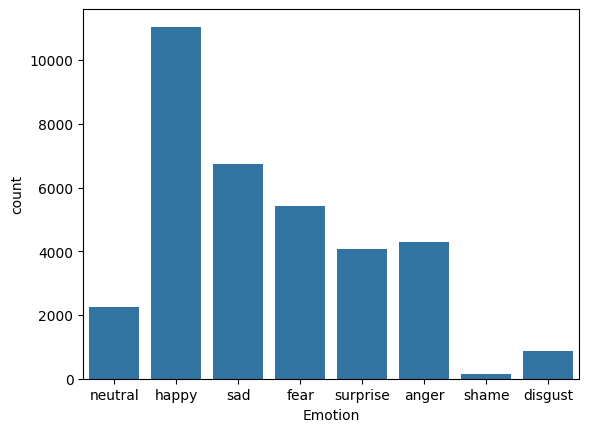

In [17]:
# Plot
sns.countplot(x='Emotion',data=df)

In [18]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [20]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [21]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,happy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sad,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,happy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,happy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,happy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [22]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [23]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [24]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [25]:
# LogisticRegression Pipeline

pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='liblinear'))])

In [26]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(solver='liblinear'))])

In [27]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(solver='liblinear'))])

In [28]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6253113623299482

In [29]:
# Make A Prediction
ex1 = "Such a lovely weather it is"

In [30]:
pipe_lr.predict([ex1])

array(['happy'], dtype=object)

In [31]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.02611549, 0.01586553, 0.05831189, 0.31658573, 0.11640318,
        0.25828224, 0.00154274, 0.20689321]])

In [32]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'shame',
       'surprise'], dtype=object)

In [33]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()